In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/telco_processed.csv")

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# stratify for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score: 0.8347914542037884


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

ROC AUC Score: 0.8204699463169938


In [16]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407

ROC AUC Score: 0.809891236262172


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:02:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


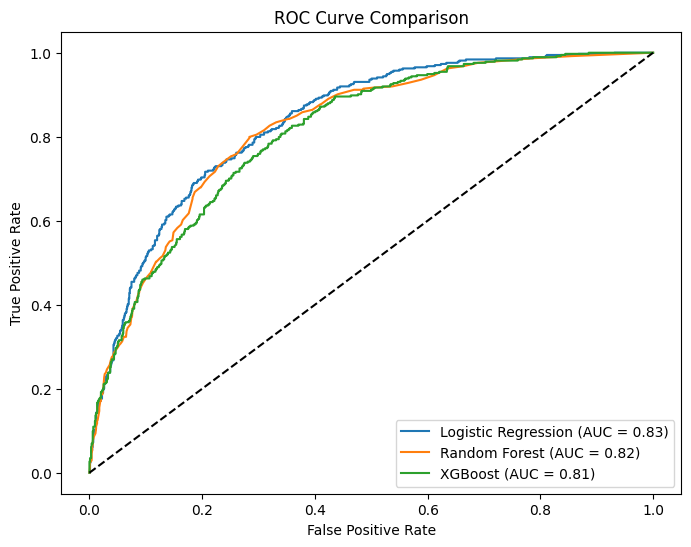

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(model_name, y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_score):.2f})")

plt.figure(figsize=(8, 6))
plot_roc("Logistic Regression", y_test, y_prob)
plot_roc("Random Forest", y_test, y_prob_rf)
plot_roc("XGBoost", y_test, y_prob_xgb)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


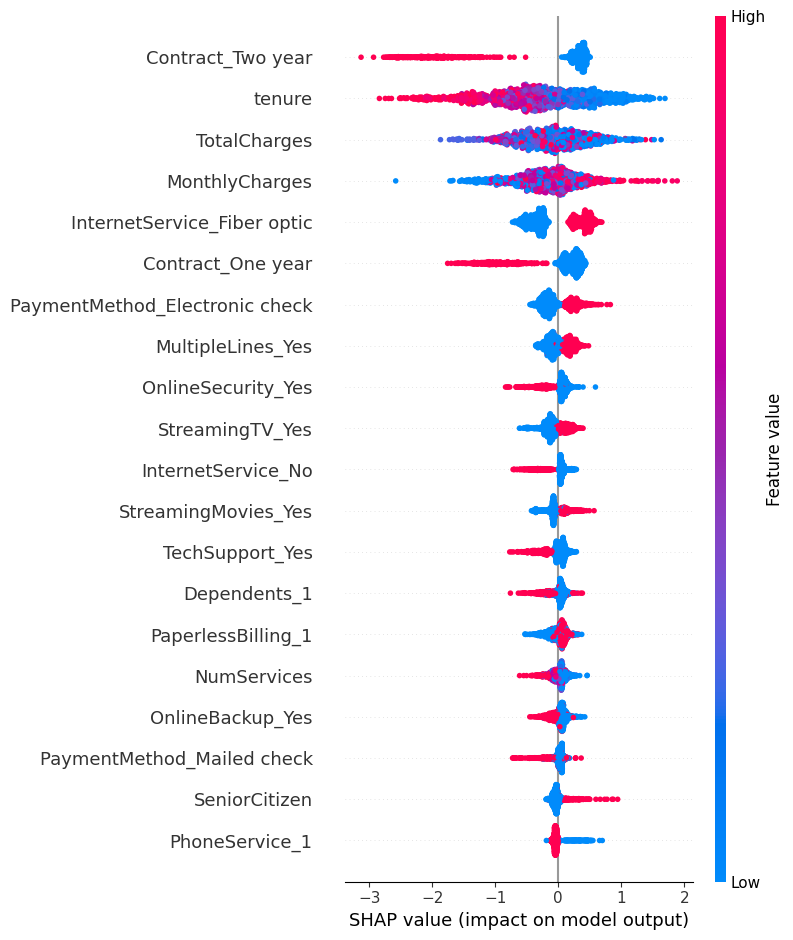

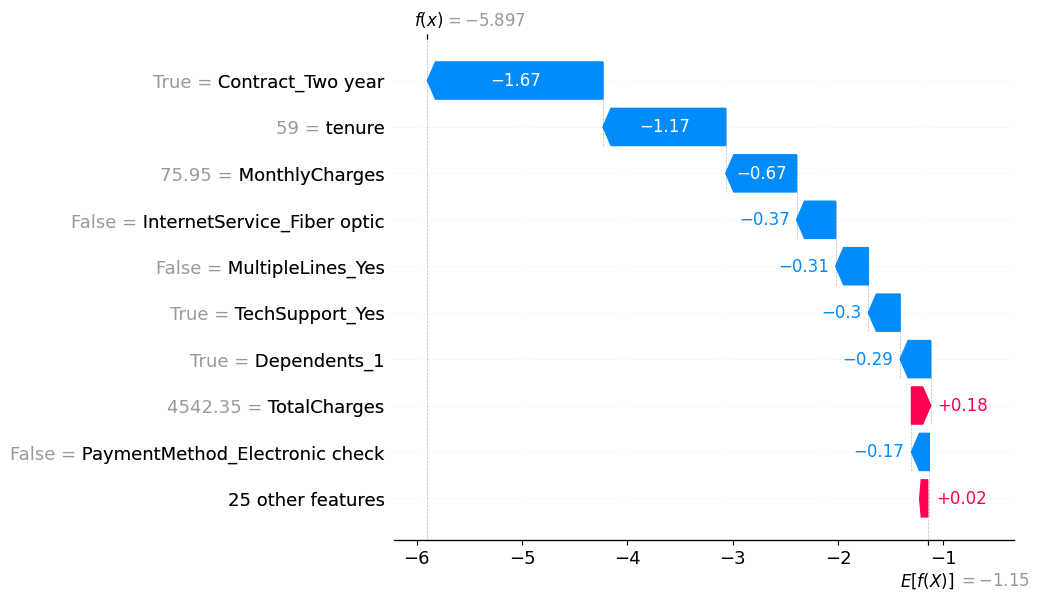

In [18]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap_values[0])

In [19]:
import joblib

joblib.dump(lr, "../src/logistic_model.pkl")
joblib.dump(X_train.columns.tolist(), "../src/model_columns.pkl")

['../src/model_columns.pkl']